### Module Import

In [1]:
import numpy as np
import pandas as pd

### Min-Max Normalization

In [2]:
before_n = np.random.normal(0, 10, size=(10,))
before_n

array([-9.00416361,  2.08694512, -8.37613501,  0.4509243 ,  9.46290203,
       -2.03785303,  2.89632848, -6.07910749, -1.18693698, -0.26791896])

In [3]:
after_n = (before_n - before_n.min()) / (before_n.max() - before_n.min())
after_n  # numpy의 Broadcast를 이용하여 간편하게 구현 가능.

array([0.        , 0.60058858, 0.03400803, 0.51199731, 1.        ,
       0.37722889, 0.64441706, 0.15839312, 0.42330638, 0.47307162])

### Z-Score Normalization

In [4]:
before_n = np.random.normal(5, 10, size=(10,))
before_n

array([ -5.78749701,  -8.81153928,   9.50489424,  11.33451834,
         7.06594794,  -0.85395526, -10.91650695,  -8.52068197,
        -1.35764311,   6.96244746])

In [5]:
after_n = (before_n - before_n.mean()) / before_n.std()
after_n

array([-0.71603865, -1.09931732,  1.22217747,  1.45407102,  0.91305609,
       -0.09074271, -1.36610897, -1.06245296, -0.15458203,  0.89993805])

### PCA (Complex Version by numpy)

<ipython-input-6-1d472b5ad431>:3: RuntimeWarning: covariance is not positive-semidefinite.
  array = np.random.multivariate_normal([5, 5], [[1, 3], [3, 1]], 50)


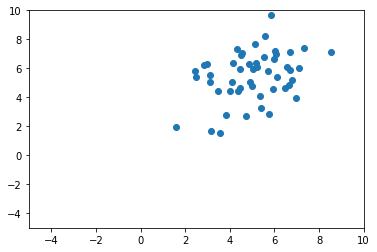

In [6]:
import matplotlib.pyplot as plt

array = np.random.multivariate_normal([5, 5], [[1, 3], [3, 1]], 50)
plt.xlim(-5, 10)
plt.ylim(-5, 10)
plt.scatter(array.T[0], array.T[1])
plt.show()

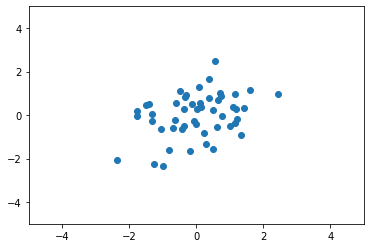

In [7]:
array -= np.array([array.T[0].mean(), array.T[1].mean()])
array /= np.array([array.T[0].std(), array.T[1].std()])

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.scatter(array.T[0], array.T[1])
plt.show()

eigenvalue:  [1.37868277 0.66213356]
eigenvector:  [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


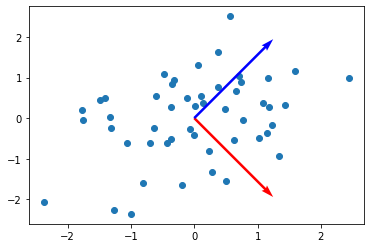

In [8]:
cov = np.cov(array.T)
eigen_val, eigen_vec = np.linalg.eig(cov)

plt.scatter(array.T[0], array.T[1])
plt.quiver([0, 0], [0, 0], eigen_vec[:, 0], eigen_vec[:, 1], color=['r', 'b'], scale=3)

print("eigenvalue: ", eigen_val)
print("eigenvector: ", eigen_vec)

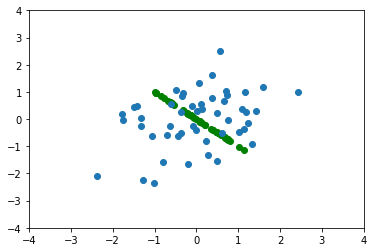

In [9]:
# 2차원 -> 1차원
index = eigen_val.argmax()
v = eigen_vec[index, :]  # norm: 1

result = array.dot(v) * v.reshape(-1, 1)
plt.scatter(result[0], result[1], color='green')
plt.scatter(array.T[0], array.T[1])
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)  # 차원 수 1개
pca.fit(array)

print('고유 값 :', pca.explained_variance_)  # 고윳값
print('고유 벡터 :', pca.components_.T)  # 고유 벡터
print('사영 후:', pca.transform(array))

고유 값 : [1.37868277]
고유 벡터 : [[-0.70710678]
 [-0.70710678]]
사영 후: [[ 0.74294083]
 [-0.94307048]
 [ 0.61839566]
 [-0.43973508]
 [ 0.29021079]
 [-1.22711771]
 [-0.97603161]
 [-0.50363041]
 [-1.51911067]
 [-1.95516322]
 [ 1.69424327]
 [-0.21173885]
 [-0.80680118]
 [ 0.06700227]
 [-2.17616083]
 [-1.02729412]
 [ 0.61817404]
 [-0.35968561]
 [-1.14520853]
 [ 0.04673977]
 [ 1.19547148]
 [-1.01964879]
 [ 0.73747498]
 [-2.42142473]
 [ 3.14625774]
 [-0.45833225]
 [-0.51561902]
 [ 1.11511519]
 [-0.75372664]
 [ 0.92259916]
 [ 0.91352659]
 [ 0.74813001]
 [-0.26835234]
 [-1.42581592]
 [ 1.27974275]
 [ 0.64486924]
 [-0.35104897]
 [-0.37354348]
 [ 1.11172166]
 [-1.2327128 ]
 [-0.42964753]
 [ 0.23598146]
 [-0.55205187]
 [ 0.4071089 ]
 [ 2.38139002]
 [ 2.49359029]
 [-0.29456415]
 [ 0.73860085]
 [ 1.30514651]
 [-0.06719663]]
